In [1]:
pip install mysql-connector-python pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.0 kB ? eta -:--:--
     ------------- ----------------------- 41.0/109.0 kB 991.0 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.0 kB 656.4 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.0 kB 656.4 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.0 kB 416.7 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.0 kB 348.6 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.0 kB 348.6 kB/s eta 0:00:01
     -------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# warnings.filterwarnings("ignore", caterogy=DeprecationWarning)

In [10]:
import os
from dotenv import load_dotenv

load_dotenv()  # Load from .env

db_config = {
    'host': os.getenv("DB_HOST"),
    'user': os.getenv("DB_USER"),
    'password': os.getenv("DB_PASSWORD"),
    'database': os.getenv("DB_NAME")
}

FUNCTION THAT TAKES QUERY, RUNS IT AND RETURNS OUTPUT

In [11]:
def run_query(query):
    # Establish connection
    conn = mysql.connector.connect(**db_config)
    
    try:
        # Run the query and load into DataFrame
        df = pd.read_sql(query, conn)
        return df
    except Exception as e:
        print("Error:", e)
        return None
    finally:
        conn.close()


FUNCTION THAT SAVES THE OUTPUT OF QUERY AS .csv FILE

In [31]:
def save_df_as_csv(df, csv_filename):
    
    if df is not None:
        df.to_csv(csv_filename, index=False)
        print(f"Data saved to {csv_filename}")
    else:
        print("No data to save.")


Query 1: Total spending per customer

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3862348222.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query1_output, x='customer_name', y='total_amount', palette='Blues_d')


Data saved to total_spending_per_customer.csv


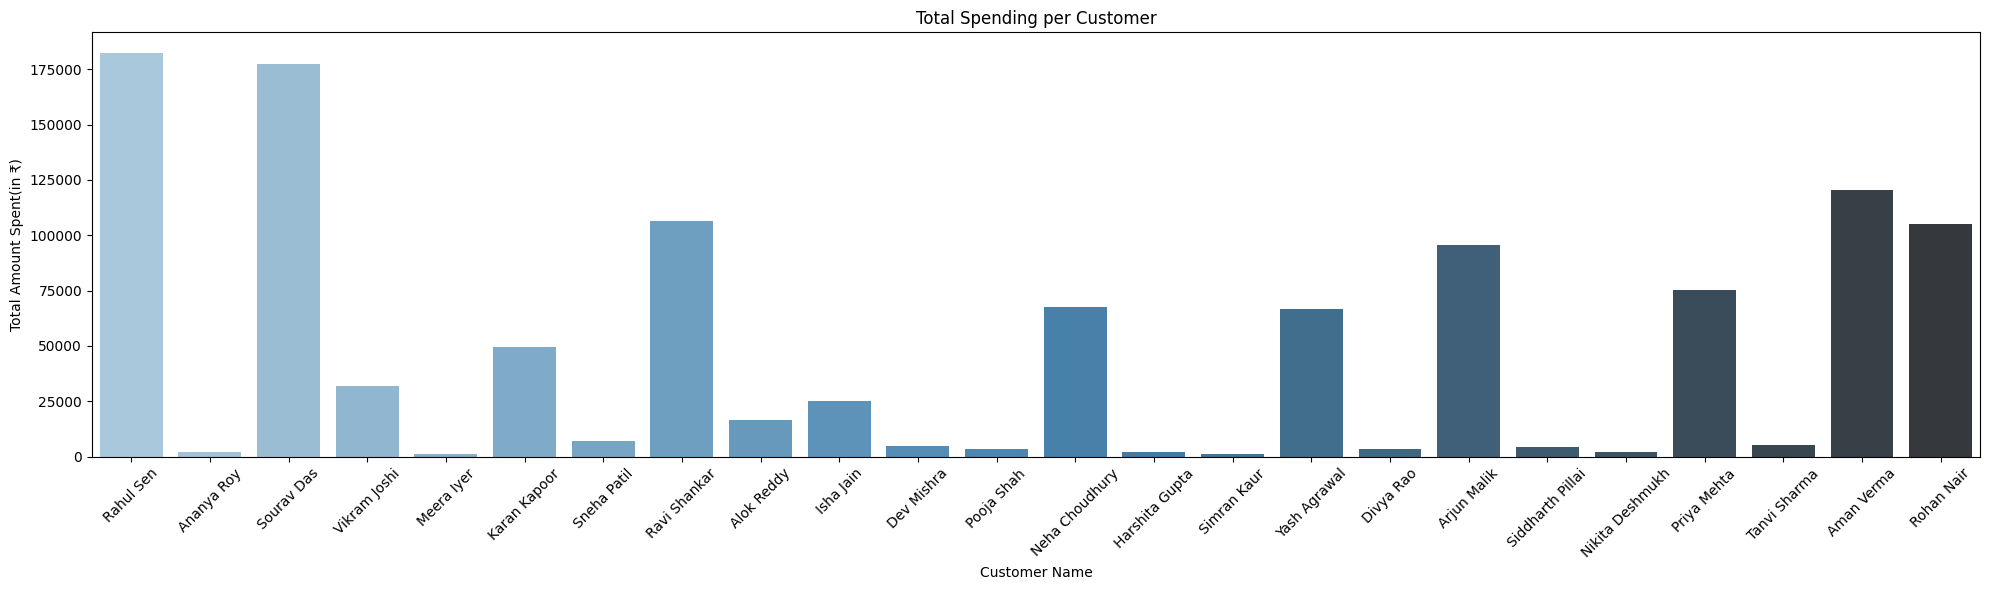

In [33]:
query1 = """
SELECT
	customer_name,
    SUM(amount) total_amount
FROM customer_transactions
WHERE status='success'
GROUP BY customer_name;
"""

query1_output = run_query(query1)

save_df_as_csv(query1_output, 'total_spending_per_customer.csv')

plt.figure(figsize=(20,6))
sns.barplot(data=query1_output, x='customer_name', y='total_amount', palette='Blues_d')
plt.title("Total Spending per Customer")
plt.xlabel("Customer Name")
plt.ylabel("Total Amount Spent(in ₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_spending_per_customer.png')
plt.show()

Query 2: Top 5 vendors by revenue

Data saved to top_5_vendors_by_revenue.csv


C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\91812\AppData\Local\Temp\ipykernel_12076\4136422498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query2_output, y='vendor_name', x='revenue', palette='Blues_d')


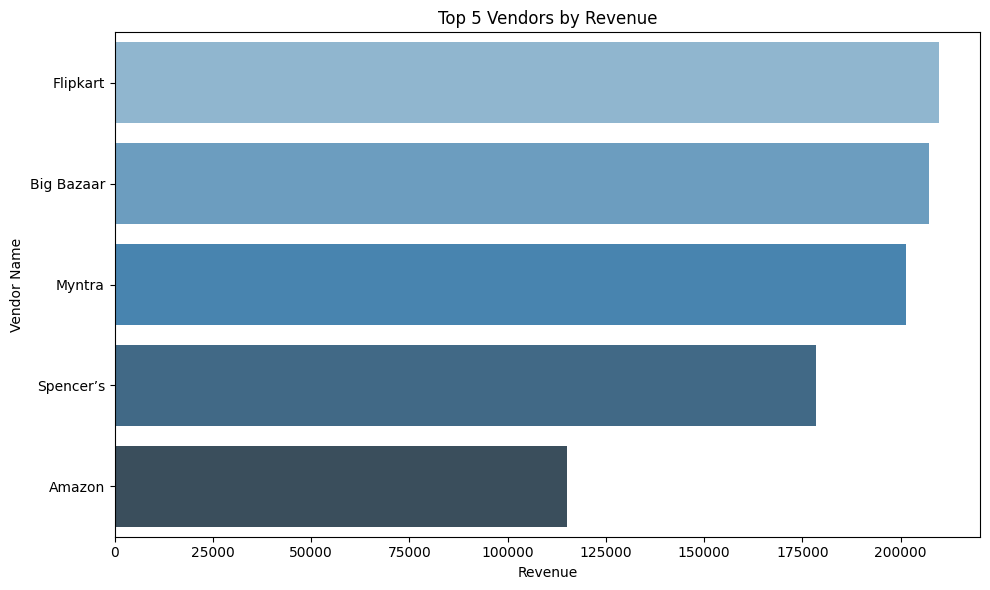

In [35]:
query2 = """
SELECT
	v.vendor_id,
    v.vendor_name,
    v.category,
    SUM(t.amount) revenue
FROM vendors v
JOIN transactions t
ON t.vendor_id=v.vendor_id
WHERE t.status='success'
GROUP BY v.vendor_id
ORDER BY revenue DESC
LIMIT 5;
"""

query2_output = run_query(query2)

save_df_as_csv(query2_output, 'top_5_vendors_by_revenue.csv')

plt.figure(figsize=(10,6))
sns.barplot(data=query2_output, y='vendor_name', x='revenue', palette='Blues_d')
plt.title("Top 5 Vendors by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Vendor Name")
plt.tight_layout()
plt.savefig('top_5_vendors_by_revenu.png')
plt.show()

Query 3: Category-wise vendors earning

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3247601301.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query3_output, x='category', y='amount_earned', palette='viridis')


Data saved to category_wise_vendors_earning.csv


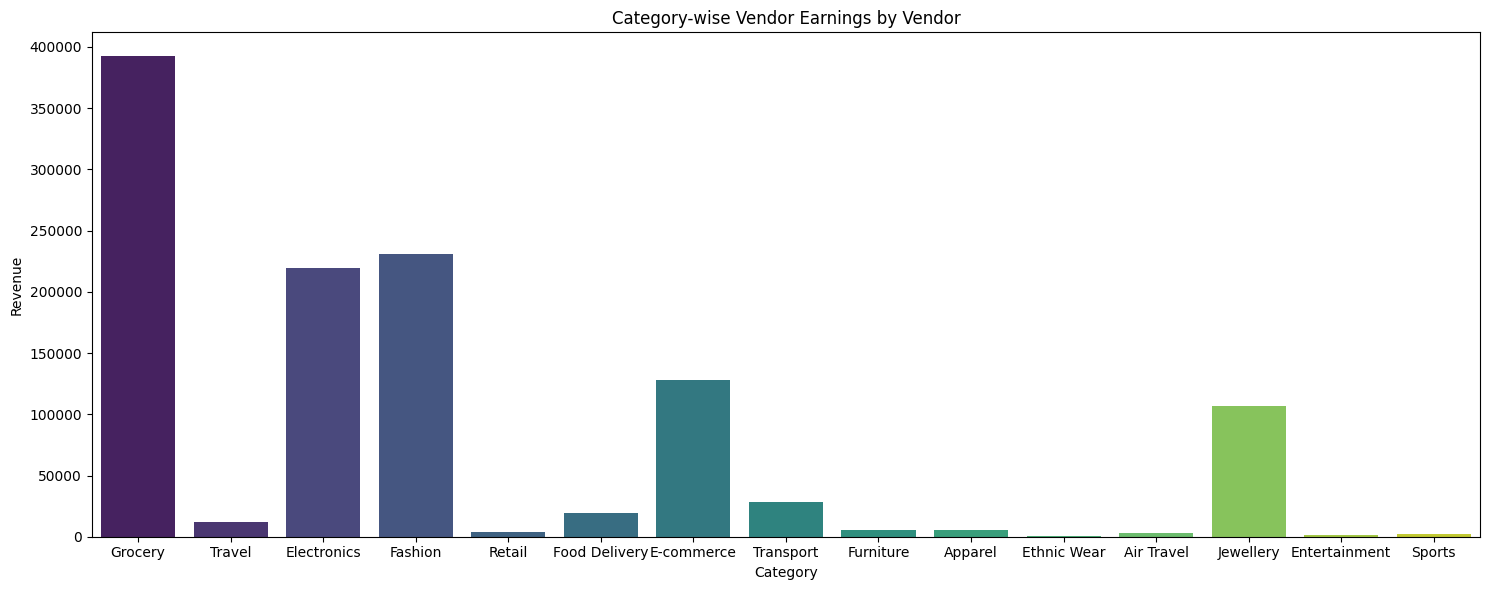

In [36]:
query3="""
SELECT
	v.category,
    SUM(t.amount) amount_earned
FROM vendors v
JOIN transactions t
ON v.vendor_id=t.vendor_id
WHERE t.status='success'
GROUP BY v.category;
"""
query3_output = run_query(query3)

save_df_as_csv(query3_output, 'category_wise_vendors_earning.csv')

plt.figure(figsize=(15,6))
sns.barplot(data=query3_output, x='category', y='amount_earned', palette='viridis')
plt.title("Category-wise Vendor Earnings by Vendor")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig('category_wise_vendors_earning.png')
plt.show()


Query 4: No of failed/reversed transactions per customer

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\91812\AppData\Local\Temp\ipykernel_12076\1334753808.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query4_output, x='customer_name', y='failed_reversed_transactions', palette='Reds_d')


Data saved to failed_reversed_transactions_per_customer.csv


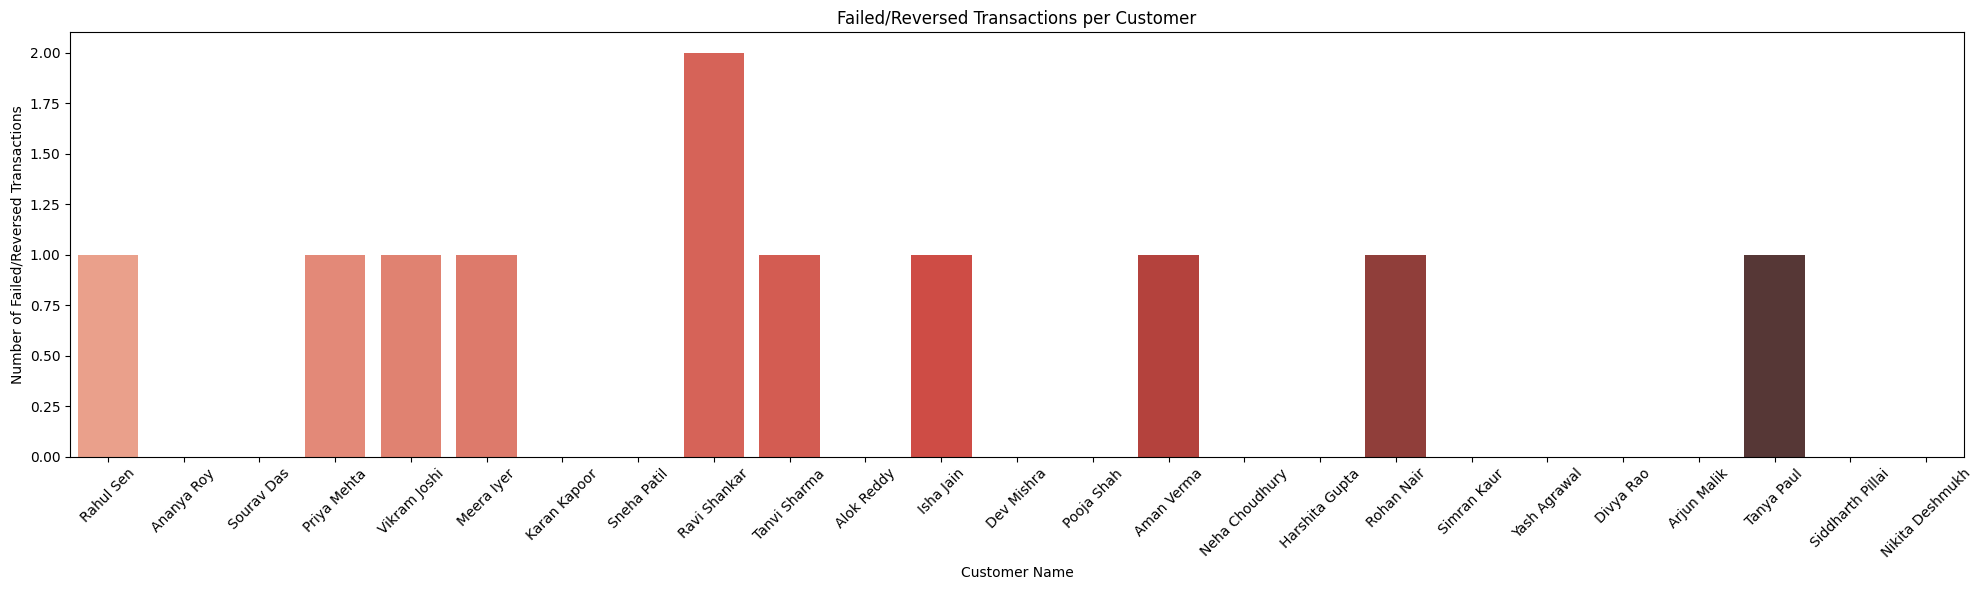

In [ ]:
query4="""
SELECT
	cu.customer_id,
    cu.customer_name,
    SUM(
		CASE
			WHEN t.status='success' THEN 0
            ELSE 1
		END
	) failed_reversed_transactions
FROM customers cu
LEFT JOIN credit_cards cc ON cu.customer_id=cc.customer_id
LEFT JOIN transactions t ON t.card_id=cc.card_id
GROUP BY cu.customer_id;
"""

query4_output = run_query(query4)

save_df_as_csv(query4_output, 'failed_reversed_transactions_per_customer.csv')

plt.figure(figsize=(20,6))
sns.barplot(data=query4_output, x='customer_name', y='failed_reversed_transactions', palette='Reds_d')
plt.title("Failed/Reversed Transactions per Customer")
plt.xlabel("Customer Name")
plt.ylabel("Number of Failed/Reversed Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_reversed_transactions_per_customer.png')
plt.show()

Query 5: Payment frequency per customer

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3854252497.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query5_output, x='customer_name', y='payment_per_month', palette='Blues_d')


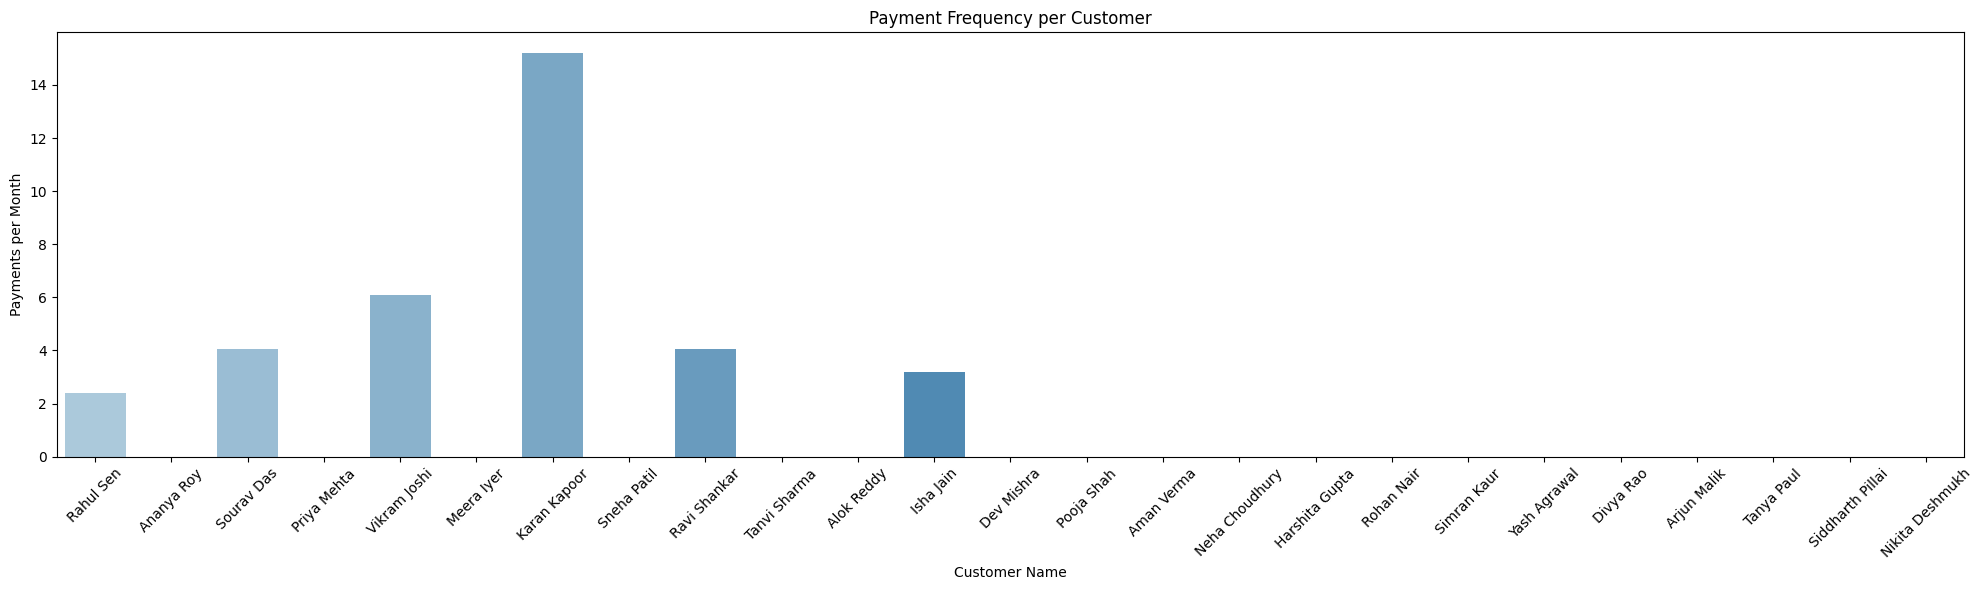

In [ ]:
query5="""
WITH cte_customer_payment AS
(
	SELECT
		cu.customer_id,
        cu.customer_name,
        cu.customer_phone,
        p.payment_date
	FROM customers cu
    LEFT JOIN credit_cards cc ON cu.customer_id=cc.customer_id
    LEFT JOIN payments p ON cc.card_id=p.card_id
)
SELECT
	customer_id,
    customer_name,
    COUNT(payment_date) total_payments,
    MIN(payment_date) first_payment,
    MAX(payment_date) last_payment,
    DATEDIFF(MAX(payment_date),MIN(payment_date)) time_span_in_days,
    CASE
		WHEN DATEDIFF(MAX(payment_date),MIN(payment_date))>0 THEN
			ROUND(COUNT(payment_date)/(DATEDIFF(MAX(payment_date),MIN(payment_date))/30.44),2)
		ELSE 0.0
	END payment_per_month
FROM cte_customer_payment
GROUP BY customer_id;
"""

query5_output = run_query(query5)

save_df_as_csv(query5_output, 'payment_frequency_per_customer.csv')

plt.figure(figsize=(20, 6))
sns.barplot(data=query5_output, x='customer_name', y='payment_per_month', palette='Blues_d')
plt.title("Payment Frequency per Customer")
plt.xlabel("Customer Name")
plt.xticks(rotation=45)
plt.ylabel("Payments per Month")
plt.tight_layout()
plt.savefig('payment_frequency_per_customer.png')
plt.show()

Query 6: City-wise credit card transactions

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


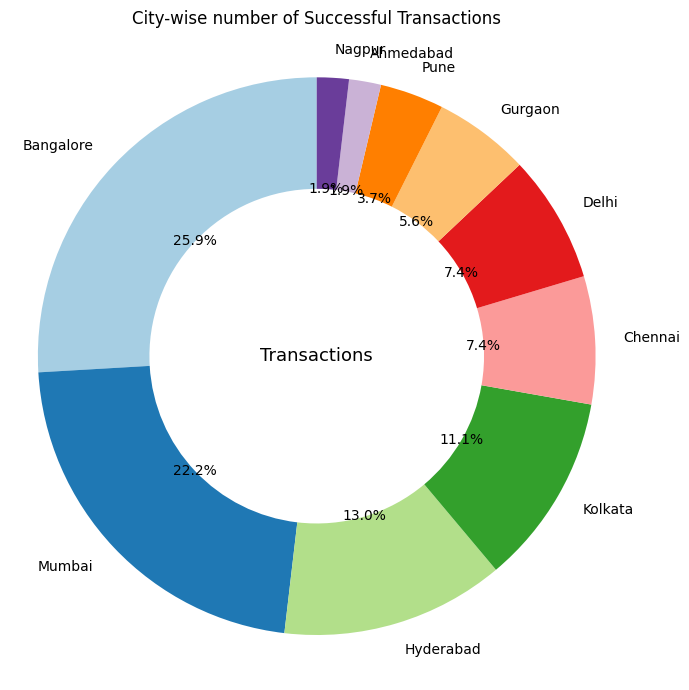

In [49]:
query6="""
SELECT
	v.city,
	COUNT(t.transaction_id) no_of_transactions,
	SUM(t.amount) total_amount
FROM vendors v
JOIN transactions t
ON v.vendor_id=t.vendor_id
WHERE t.status='success'
GROUP BY v.city
ORDER BY no_of_transactions DESC,total_amount DESC
"""

query6_output = run_query(query6)

# save_df_as_csv(query6_output, 'city_wise_credit_card_transactions.csv')

plt.figure(figsize=(7,7))
plt.pie(query6_output['no_of_transactions'], labels=query6_output['city'], autopct='%1.1f%%', startangle=90,wedgeprops=dict(width=0.4), colors=plt.cm.Paired.colors)
plt.text(0, 0, 'Transactions', ha='center', va='center', fontsize=13)

plt.title("City-wise number of Successful Transactions")
plt.axis('equal')  # Ensures it's a perfect circle
plt.tight_layout()
plt.savefig('city_wise_credit_card_transactions.png')
plt.show()

Query 7: Monthly spending summary

C:\Users\91812\AppData\Local\Temp\ipykernel_12076\3140251582.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data saved to monthly_spending_summary.csv


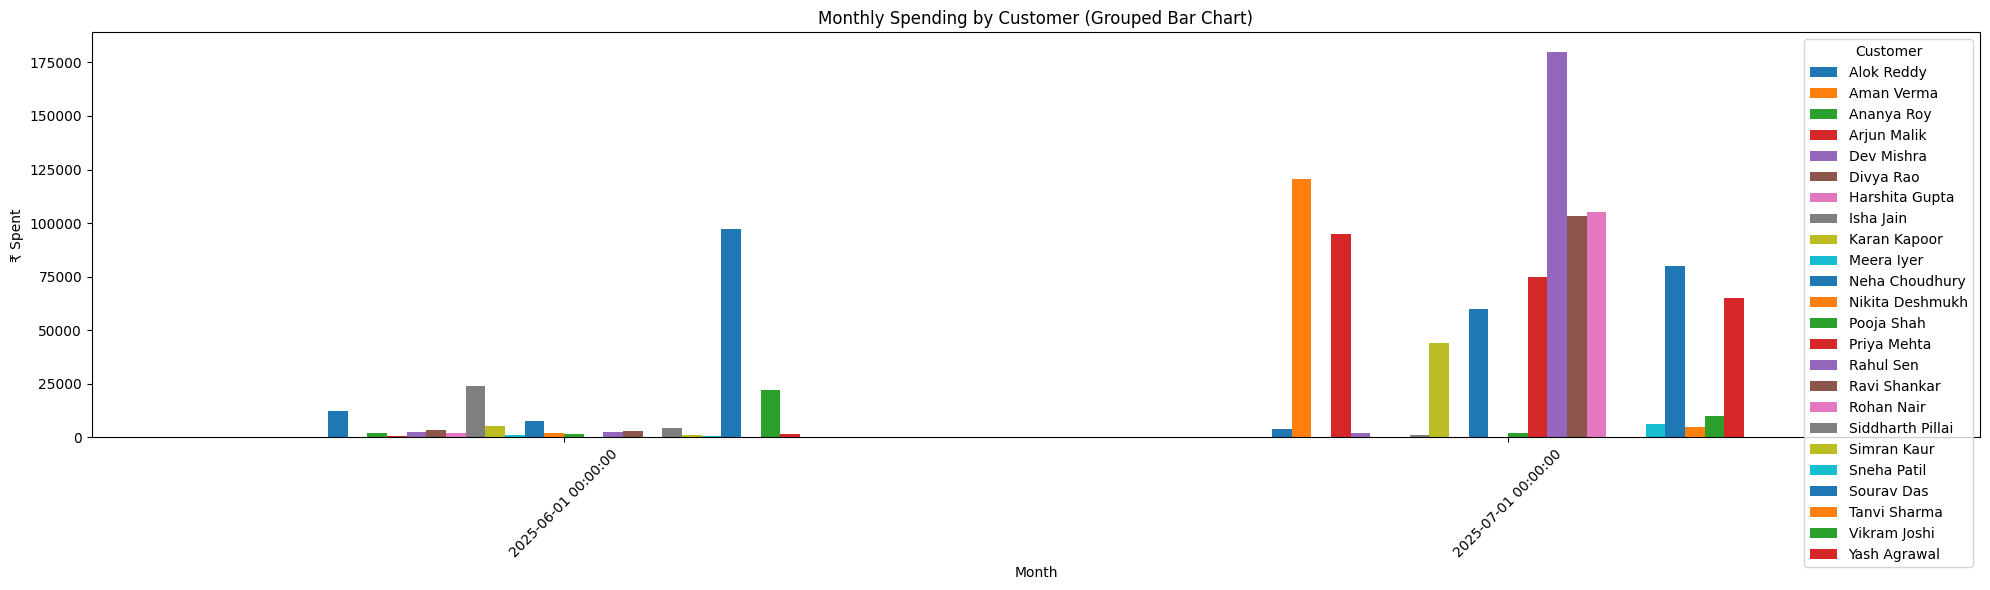

In [56]:
query7="""
SELECT * FROM monthly_spending_summary;
"""

query7_output = run_query(query7)

save_df_as_csv(query7_output, 'monthly_spending_summary.csv')

query7_output['month_year'] = pd.to_datetime(query7_output['month_year'], format='%m-%Y')
df = query7_output.sort_values(['customer_name', 'month_year'])
pivot_df = df.pivot(index='month_year', columns='customer_name', values='monthly_spent').fillna(0)
pivot_df.plot(kind='bar', figsize=(20,6))
plt.title("Monthly Spending by Customer (Grouped Bar Chart)")
plt.xlabel("Month")
plt.ylabel("₹ Spent")
plt.xticks(rotation=45)
plt.legend(title="Customer")
plt.tight_layout()
plt.savefig('monthly_spending_summary.png')
plt.show()
